In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import graphviz 

In [5]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv ( "Admission_Predict .csv" )
#to remove coulumn space
df.columns = df.columns.str.rstrip()

In [7]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
df.isna()
df = df.drop_duplicates()

In [9]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
df.loc[df['Chance of Admit'] >= 0.80, 'Chance of Admit'] = 1
df.loc[df['Chance of Admit'] < 0.80, 'Chance of Admit'] = 0

In [11]:
x = df.iloc [0:400 , 1:8]
y = df ['Chance of Admit']

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [13]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [15]:
x_train.shape

(300, 7)

In [16]:
y_train.shape

(300,)

In [17]:
x_test.shape

(100, 7)

In [18]:
y_test.shape

(100,)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier (criterion = 'entropy')
model = model.fit(x_train , y_train)
model
#jab entropy = 0 that's my leaf node

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_predict = model.predict ( x_test )
y_predict

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [22]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix (y_test , y_predict)
matrix

array([[60,  8],
       [10, 22]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test,y_predict))


0.82


In [24]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        68
         1.0       0.73      0.69      0.71        32

    accuracy                           0.82       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.82      0.82      0.82       100



In [25]:
feature_name = df.columns[0:7]
print(feature_name , end = '')

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA'],
      dtype='object')

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

['0.0', '1.0']


[Text(0.4125, 0.9583333333333334, 'LOR <= 8.94\nentropy = 0.904\nsamples = 300\nvalue = [204, 96]\nclass = 0.0'),
 Text(0.1, 0.875, 'LOR <= 8.63\nentropy = 0.3\nsamples = 207\nvalue = [196, 11]\nclass = 0.0'),
 Text(0.05, 0.7916666666666666, 'entropy = 0.0\nsamples = 153\nvalue = [153, 0]\nclass = 0.0'),
 Text(0.15, 0.7916666666666666, 'CGPA <= 0.5\nentropy = 0.729\nsamples = 54\nvalue = [43, 11]\nclass = 0.0'),
 Text(0.1, 0.7083333333333334, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = 0.0'),
 Text(0.2, 0.7083333333333334, 'GRE Score <= 105.0\nentropy = 0.967\nsamples = 28\nvalue = [17, 11]\nclass = 0.0'),
 Text(0.15, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0.0'),
 Text(0.25, 0.625, 'LOR <= 8.665\nentropy = 1.0\nsamples = 22\nvalue = [11, 11]\nclass = 0.0'),
 Text(0.2, 0.5416666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1.0'),
 Text(0.3, 0.5416666666666666, 'University Rating <= 3.25\nentropy = 0.964\nsamples = 18\nvalue = [11, 7]\ncl

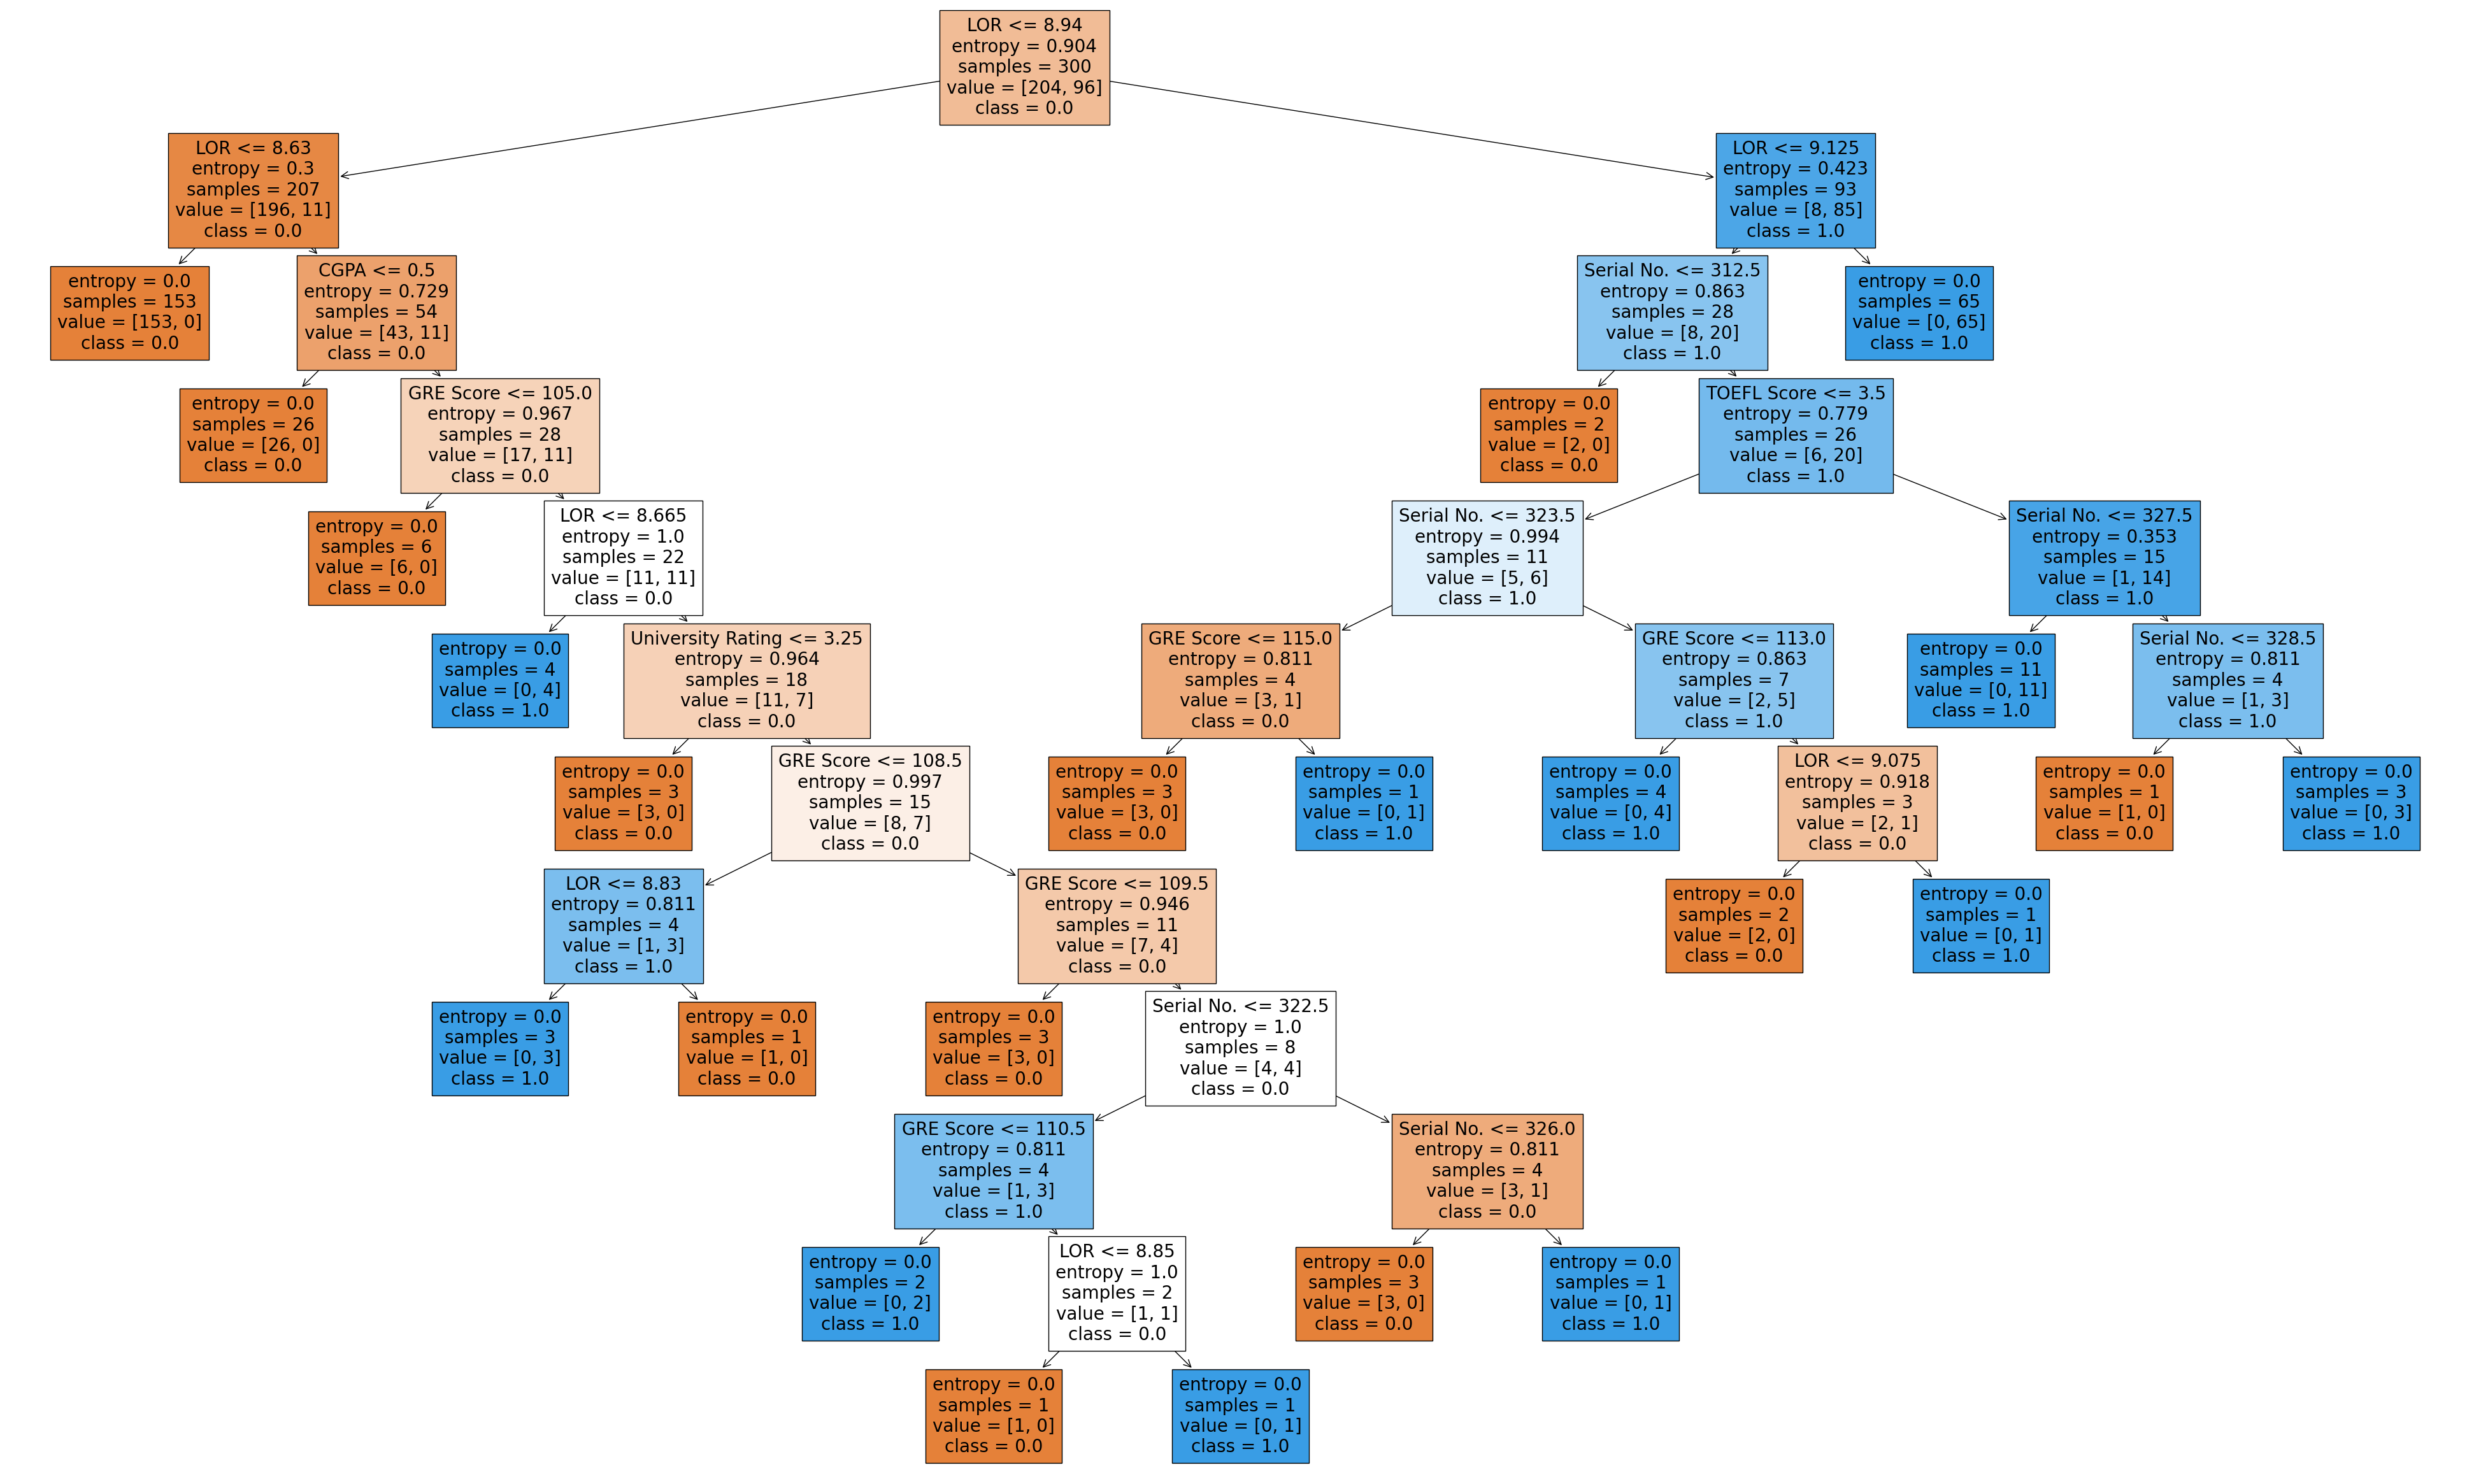

In [27]:
class_names = [str(x) for x in model.classes_]
print(class_names)
fig = plt.figure(figsize = (50,30) )
plot_tree (model , feature_names = feature_name , class_names = class_names, filled = True)

In [28]:
from sklearn import tree

In [29]:
dot_data = tree.export_graphviz ( model ,feature_names = feature_name , class_names = class_names, filled = True )

In [30]:
# graph = graphviz.Source(dot_data , format = "png")
# graph

In [31]:
from sklearn.model_selection import StratifiedKFold 
sf = StratifiedKFold(n_splits=5,shuffle=False, random_state=None)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
depth = [1,2,3,4,5,6,7,8,9,10]

In [37]:
for d in depth:
    score=cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),x_train,y_train,cv=sf,scoring='accuracy')
    print('Average score for depth {} is : {}'.format(d,score.mean()))

Average score for depth 1 is : 0.9333333333333332
Average score for depth 2 is : 0.9333333333333332
Average score for depth 3 is : 0.9133333333333333
Average score for depth 4 is : 0.9
Average score for depth 5 is : 0.8799999999999999
Average score for depth 6 is : 0.8866666666666667
Average score for depth 7 is : 0.8800000000000001
Average score for depth 8 is : 0.8800000000000001
Average score for depth 9 is : 0.8800000000000001
Average score for depth 10 is : 0.8800000000000001


In [38]:
score.mean()

0.8800000000000001